<a href="https://colab.research.google.com/github/eliransr/deepLearning_models/blob/master/Bears%20classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Creating my own dataset from Google Images**

In [ ]:
###Create directory and upload urls files into my server
from fastai import *
from fastai.vision import *

## **Get a list of URLs**

In [ ]:
##Go to Google Images and search for the images you are interested in.
##Download into file
# urls=Array.from(document.querySelectorAll('.rg_i')).map(el=> el.hasAttribute('data-src')?el.getAttribute('data-src'):el.getAttribute('data-iurl'));
# window.open('data:text/csv;charset=utf-8,' + escape(urls.join('\n')));

In [ ]:
##Create directory and upload urls file into your server
#Choose an appropriate name for your labeled images. You can run these steps multiple times to create different labels.
folder = 'black'
file = 'black_bears.txt'

In [ ]:
folder = 'grizzly'
file = 'brown_bears.txt'

In [ ]:
folder = 'teddys'
file = 'teddys.txt'

In [ ]:
#You will need to run this cell once per each category.
path = Path('data/bears')
dest = path/folder
dest.mkdir(parents=True , exist_ok=True)

## **Download images**

In [ ]:
#download they images from their respective urls.
classes = ['teddys' , 'grizzly' , 'black']

In [ ]:
#You will need to run this cell once per each category.
download_images(path/file,dest, max_pics=200)
# If you have problems download, try with `max_workers=0` to see exceptions:
# download_images(path/file, dest, max_pics=20, max_workers=0)

In [ ]:
#For remove any images that can't be opened
for c in classes:
  print(c)
  verify_images(path/c, delete=True, max_workers=8)

teddys


grizzly


black


## **View data**

In [ ]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train=".", valid_pct=0.2,
       ds_tfms=get_transforms(), size=224, num_workers=4).normalize(imagenet_stats)

In [ ]:
data.classes

['black', 'grizzly', 'teddys']

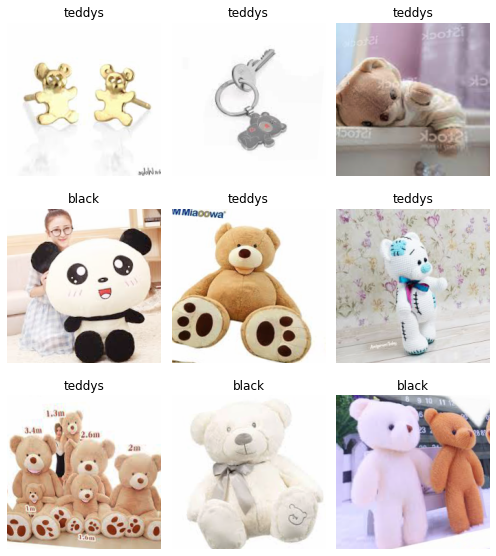

In [ ]:
#Let's take a look at some of our pictures then.
data.show_batch(rows=3, figsize=(7,8))

In [ ]:
data.classes, data.c, len(data.train_ds), len(data.valid_ds)

(['black', 'grizzly', 'teddys'], 3, 279, 69)

## **Train model**

In [ ]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [ ]:
learn.fit_one_cycle(4)

In [ ]:
learn.save('stage-1')

In [ ]:
learn.unfreeze()

In [ ]:
learn.lr_find()

In [ ]:

# If the plot is not showing try to give a start and end learning rate
# learn.lr_find(start_lr=1e-5, end_lr=1e-1)
learn.recorder.plot()

In [ ]:
learn.fit_one_cycle(2, max_lr=slice(3e-5,3e-4))

In [ ]:
learn.save('stage-2')

## **Interpretation**

In [ ]:
learn.load('stage-2');

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)

In [ ]:
interp.plot_confusion_matrix()